# Predictive Maintenance of Automatic Machines
### We will focus on creating a predictive model to identify potential failures in automatic machines based on a database example. The goal is to demonstrate how machine learning techniques can be applied to improve maintenance and prevent machine downtime.

** Coesia machinery
<center><img src="immagineIntro.png" width="100%"/></center>

## Predictive Maintenance of Automatic Machines
**Some context information:**
* Coesia is a producer of automatic machines for various markets. It stands out for its high technology and performance guaranteed to the customer. The market is increasingly asking to develop services around our products. For this reason, one of the most relevant aspects to address when talking about AI applied to Coesia's product concerns the service and, in particular, predictive maintenance. To discuss maintenance, it is necessary to think about how to collect data and how to create a benefit for the customer in data collection, which at the moment could be the biggest obstacle. Indeed, most customers are reluctant to leave a data collection channel open because it could be seen as "sticking their nose into their business." We need to transform this need of ours into value for the customer. Our machines should be designed integrating IoT (Internet of Things) to allow the collection and analysis of huge amounts of data from sensors installed on the machines. Through the processing of this data, it is possible to identify patterns that precede failures or malfunctions, allowing proactive intervention for maintenance, thereby reducing unplanned machine downtimes. Another challenge for COESIA should be to make "standard" parts or functions of the machine so that the collected data can be consistent and reapplicable to various types of machines. If every machine is different from the others, it could take years before having a database usable for an AI. It will not be enough to collect data, but also to create a work team that can clean and integrate it with information collected from the customer. For example, it is necessary to know when a customer performs maintenance and replaces spare parts to keep track of it within the data. In addition, there may be cases where the customer independently tampers with parts of the machine or uses non-original parts. This could compromise the quality of the data. For this reason, on-site monitoring at the customer's location is essential.
    

#### Getting started
the first thing to analyze is the type of sensors to install based on the mechanism for which you want to predict the fault to initiate predictive maintenance. The other important aspect then concerns the cloud in which to store the data, for this reason it is assumed that the machine is connected to the IoT network.
For our example, let's pretend to measure Temperature, Pressure, and Vibrations of the interested part of the machine.

In [2]:
import pandas as pd

# Loading the datasets
data_realistic_path = 'sensor_data_realistic.csv'
data_with_anomalies_path = 'sensor_data_with_anomalies.csv'

data_realistic = pd.read_csv(data_realistic_path)
data_with_anomalies = pd.read_csv(data_with_anomalies_path)

# Displaying the first few rows of each dataset for a preview
print("Realistic Dataset:")
print(data_realistic.head())


Realistic Dataset:
             timestamp  temperature  vibration  noise  fault
0  2023-01-01 08:00:00         20.0         31     17      0
1  2023-01-01 08:01:00         20.0         26     19      0
2  2023-01-01 08:02:00         20.0         30     13      0
3  2023-01-01 08:03:00         20.0         33     11      0
4  2023-01-01 08:04:00         20.0         30     14      0


# Data Normalization for Machine Learning

This notebook outlines the process of normalizing two datasets for use in machine learning models. The first dataset is a realistic dataset without anomalies, and the second dataset contains anomalies. Normalization is a crucial preprocessing step that scales numeric data to fall within a specified range – in this case, between 0 and 1, making it easier for machine learning models to process and learn from the data.

## Process Overview:
1. **Load the Datasets**: Load both the realistic and the anomalous datasets.
2. **Preprocess Data**: Exclude non-numeric columns such as timestamps.
3. **Apply MinMaxScaler**: Normalize the numeric data using MinMaxScaler.
4. **Reintegrate Data**: Add the non-numeric data back into the normalized datasets.
5. **Data Analysis**: Briefly analyze the normalized data.



In [3]:
from sklearn.preprocessing import MinMaxScaler

# Loading the datasets
data_realistic_path = 'sensor_data_realistic.csv'
data_with_anomalies_path = 'sensor_data_with_anomalies.csv'

data_realistic = pd.read_csv(data_realistic_path)
data_with_anomalies = pd.read_csv(data_with_anomalies_path)

# Assuming 'timestamp' is the name of the time column
# Save timestamp columns
timestamp_realistic = data_realistic['timestamp']
timestamp_anomalies = data_with_anomalies['timestamp']

# Remove the timestamp column from datasets
data_realistic = data_realistic.drop(columns=['timestamp'])
data_with_anomalies = data_with_anomalies.drop(columns=['timestamp'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the realistic data and transform both datasets
scaler.fit(data_realistic)
data_realistic_normalized = scaler.transform(data_realistic)
data_with_anomalies_normalized = scaler.transform(data_with_anomalies)

# Convert the transformed data back into pandas DataFrames
data_realistic_normalized = pd.DataFrame(data_realistic_normalized, columns=data_realistic.columns)
data_with_anomalies_normalized = pd.DataFrame(data_with_anomalies_normalized, columns=data_with_anomalies.columns)

# Re-add timestamp columns
data_realistic_normalized['timestamp'] = timestamp_realistic.reset_index(drop=True)
data_with_anomalies_normalized['timestamp'] = timestamp_anomalies.reset_index(drop=True)

# Display the first few rows to confirm normalization
print("Normalized Realistic Dataset:")
print(data_realistic_normalized.head())
#print("\nNormalized Dataset with Anomalies:")
#print(data_with_anomalies_normalized.head())


Normalized Realistic Dataset:
   temperature  vibration     noise  fault            timestamp
0          0.0   0.666667  0.777778    0.0  2023-01-01 08:00:00
1          0.0   0.111111  1.000000    0.0  2023-01-01 08:01:00
2          0.0   0.555556  0.333333    0.0  2023-01-01 08:02:00
3          0.0   0.888889  0.111111    0.0  2023-01-01 08:03:00
4          0.0   0.555556  0.444444    0.0  2023-01-01 08:04:00


# Data Exploration and Feature Engineering

In this section, we'll dive into Exploratory Data Analysis (EDA) and Feature Engineering for our two datasets: one that represents realistic data without anomalies and another that contains anomalies. The goal is to understand the underlying structure of the data, identify any patterns or anomalies, and engineer features that will help our machine learning model to make accurate predictions.

## Data Exploration

We will perform various EDA techniques to uncover insights from our datasets. This includes examining the distributions of features, understanding correlations between different features, and identifying any outliers or unusual patterns that may indicate anomalies.

## Feature Engineering

Based on the insights gained from EDA, we will create new features or modify existing ones to improve our model's ability to detect anomalies. This could involve creating derived attributes, applying dimensionality reduction techniques, or encoding categorical features for machine learning readiness.

Let's begin by analyzing our datasets.


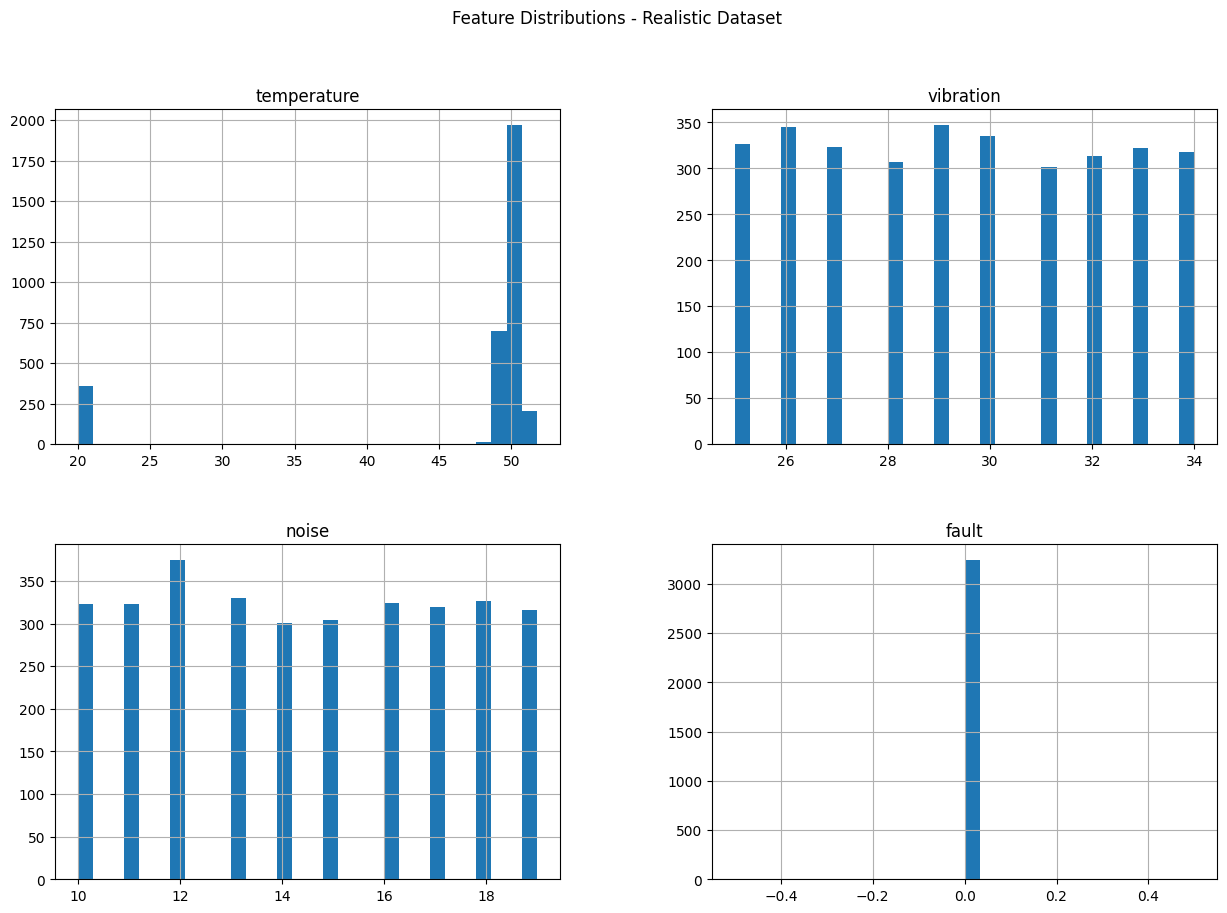

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature distributions in the realistic dataset
data_realistic.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions - Realistic Dataset')
plt.show()




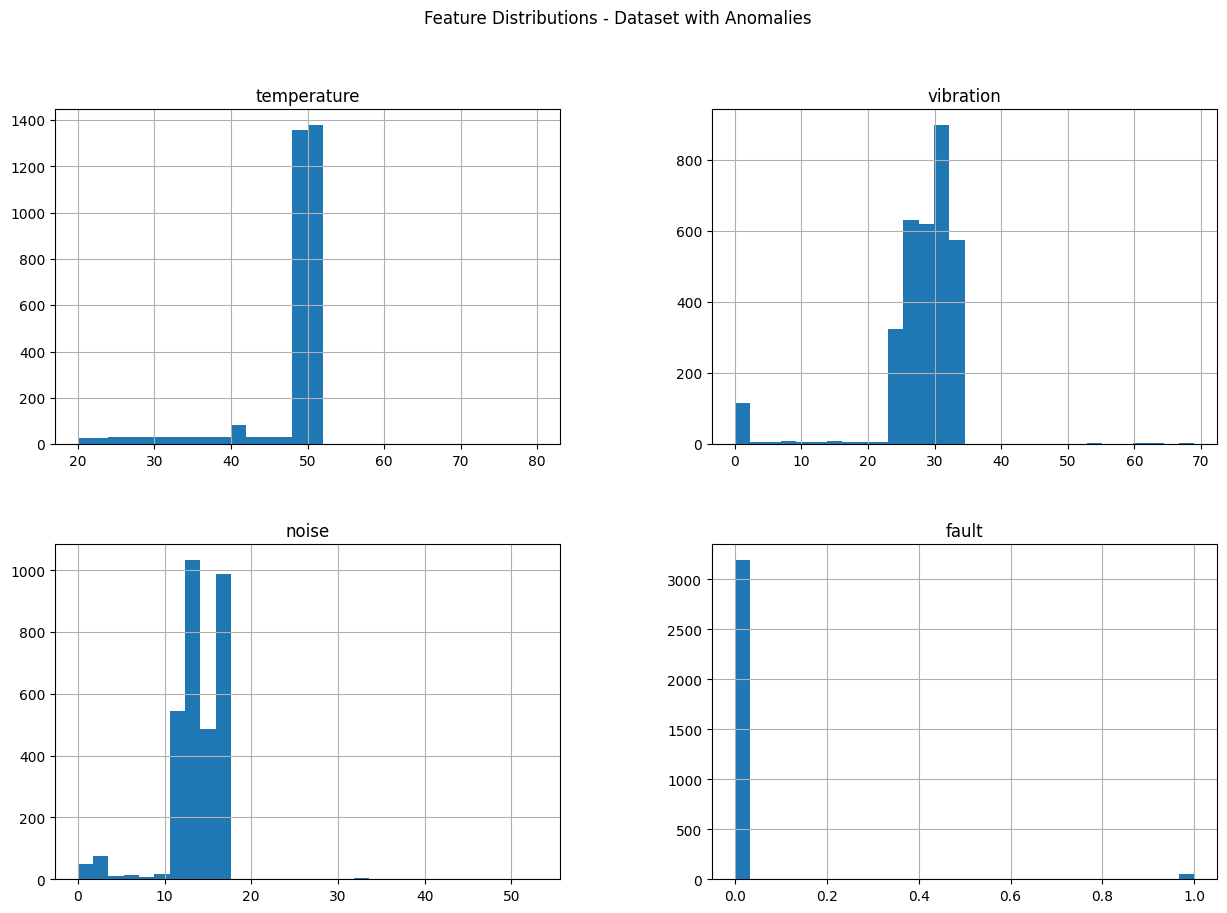

In [4]:
# Feature distributions in the dataset with anomalies
data_with_anomalies.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions - Dataset with Anomalies')
plt.show()



# Step 4: Building the Model

In this section, we will focus on constructing a predictive model using a supervised learning approach. We have a labeled dataset where the presence of anomalies (faults) is known, allowing us to train a classification model to predict future occurrences of these events.

## Model Selection

We will use the Random Forest classifier for its versatility and ability to capture complex relationships between features without requiring extensive parameter tuning.

## Features

The model will be trained on features that include the raw sensor readings, as well as engineered features that capture the specific oscillation patterns and temperature changes known to precede faults.

## Evaluation

We will evaluate our model based on its accuracy, precision, recall, and F1-score to ensure that it not only predicts faults accurately but also minimizes false positives and false negatives.

Let's build and train our Random Forest model.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
import pandas as pd

# Assuming we have a DataFrame 'data_with_anomalies_normalized' ready for use
# And assuming 'timestamp' and 'fault' are the non-numeric columns or labels to predict

X = data_with_anomalies_normalized.drop(['fault', 'timestamp'], axis=1)  # Removing the label and non-numeric column
y = data_with_anomalies_normalized['fault']  # Isolating the label

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on training data
rf_clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_clf.predict(X_test)

# Evaluating the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = rf_clf.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Feature importance:")
print(importance_df)

# Saving the trained model to a .pkl file
dump(rf_clf, 'random_forest_model.pkl')




              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       640
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00       648
   macro avg       1.00      1.00      1.00       648
weighted avg       1.00      1.00      1.00       648

[[640   0]
 [  0   8]]
Importanza delle caratteristiche:
       Feature  Importance
1    vibration    0.481480
2        noise    0.384954
0  temperature    0.133567


['random_forest_model.pkl']

## Adding New Data Set for Anomaly Risk Detection
This section demonstrates how to incorporate a new set of data, sensor_data_risk_anomaly.csv, which simulates conditions indicating a high risk of an anomaly that, however, does not materialize. The goal is to enrich the predictive model to not only detect actual anomalies but also to identify and alert on potential risk conditions for proactive maintenance efforts. This involves normalizing the new data to match the scale of the training data, ensuring feature alignment, and then using this data to test or retrain the predictive model.

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import joblib  # If you need to load the model from a file

# Load the new data
new_data_path = 'sensor_data_risk_anomaly.csv'
new_data = pd.read_csv(new_data_path)

# Separate the timestamps and fault column if present
timestamps = new_data['timestamp']
faults = new_data['fault'] if 'fault' in new_data else None
new_data = new_data.drop(columns=['timestamp', 'fault'], errors='ignore')

# Initialize MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_data)
new_data_scaled = scaler.transform(new_data)

# Convert the scaled data back to a DataFrame
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)

# Add the 'timestamp' and 'fault' columns back to the scaled DataFrame if they were present
new_data_scaled['timestamp'] = pd.to_datetime(timestamps)
if faults is not None:
    new_data_scaled['fault'] = faults

# Make sure your RandomForestClassifier model is loaded
rf_clf = joblib.load('random_forest_model.pkl')  # Uncomment and replace with model

# Predict using the RandomForestClassifier model
# The features must be in the same order as when the model was trained
features = new_data_scaled.drop(columns=['timestamp', 'fault'], errors='ignore')  # Adjust if your model uses different features
predictions = rf_clf.predict(features)

# Add the predictions back to the DataFrame
new_data_scaled['predictions'] = predictions



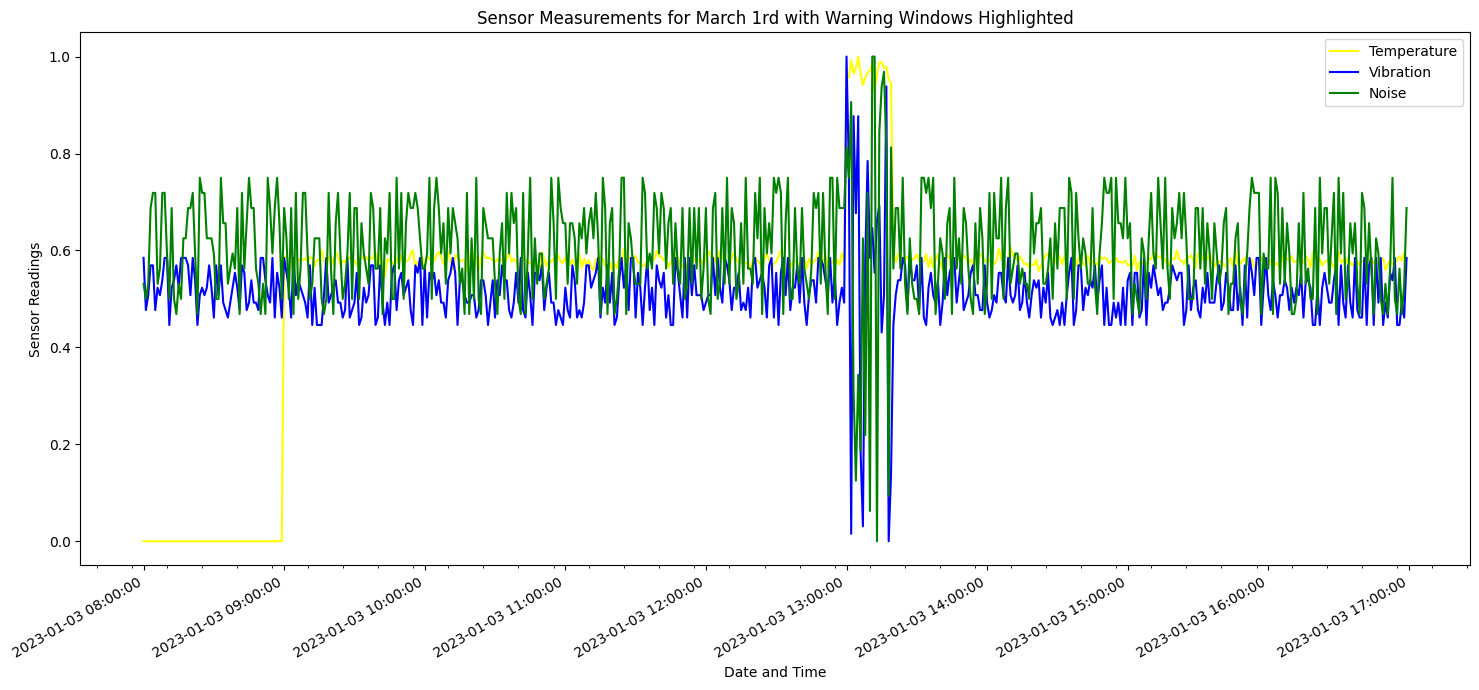

In [12]:
# Filter for data on March 1rd
start_date = "2023-01-03 00:00:00"
end_date = "2023-01-03 23:59:59"
mask = (new_data_scaled['timestamp'] >= start_date) & (new_data_scaled['timestamp'] <= end_date)
march_3rd_data = new_data_scaled.loc[mask]

# Plotting code goes here - same as provided earlier, with any corrections applied

# Plotting
plt.figure(figsize=(15, 7))

# Plot temperature, vibration, and noise for March 1rd
plt.plot(march_3rd_data['timestamp'], march_3rd_data['temperature'], label='Temperature', color='yellow')
plt.plot(march_3rd_data['timestamp'], march_3rd_data['vibration'], label='Vibration', color='blue')
plt.plot(march_3rd_data['timestamp'], march_3rd_data['noise'], label='Noise', color='green')

# Highlight the warning zones on March 1rd
warnings = march_3rd_data[march_3rd_data['predictions'] == 1]['timestamp']
for warning_time in warnings:
    plt.axvspan(warning_time, warning_time + pd.Timedelta(minutes=10), color='red', alpha=0.3)

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set locator to every hour
plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))  # Optionally set minor locator to every 15 minutes
plt.gcf().autofmt_xdate()  # Rotate the x dates slightly
plt.legend()
plt.xlabel('Date and Time')
plt.ylabel('Sensor Readings')
plt.title('Sensor Measurements for March 1rd with Warning Windows Highlighted')
plt.tight_layout()  # Adjust the layout to fit everything nicely

# Show the plot
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculating evaluation metrics
accuracy = accuracy_score(faults, predictions)
precision = precision_score(faults, predictions, average='binary', zero_division=0)  
recall = recall_score(faults, predictions, average='binary', zero_division=0)  # Use 'binary' for binary classification


# Printing the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# For a more detailed understanding, you can also view the confusion matrix
conf_matrix = confusion_matrix(faults, predictions)
print("Confusion Matrix: \n", conf_matrix)


Accuracy:  0.43209876543209874
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Matrice di Confusione: 
 [[1400    0]
 [1840    0]]


## CONCLUSIONS
This is just a first approach to the world of data analysis with AI models. The datasets have been prepared in a synthetic manner, starting from Python algorithms that are not representative of reality. Moreover, the data sample used is small and not sufficient to train the model. Surely, the model as it is suffers from overfitting, which the professor has warned us about numerous times.
We tried using a third data set to evaluate the model, and the performance was poor. We would have liked to continue exploring this exercise to then discuss it in class, but time is not on our side. Certainly, all the examples seen in class have given us the opportunity to understand what is behind AI and how, albeit in a simple way, it can be applied to the myriad cases we deal with every day.